In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "d1.csv"
df = pd.read_csv(file)

df.dtypes

survey_date                object
region                     object
country                    object
ip_latitude               float64
ip_longitude              float64
ip_accuracy                 int64
gender                     object
age                        object
height                      int64
weight                      int64
bmi                       float64
blood_type                 object
insurance                  object
income                     object
race                       object
immigrant                  object
smoking                    object
contacts_count            float64
house_count                 int64
public_transport_count    float64
working                    object
worried                   float64
covid19_positive            int64
covid19_symptoms            int64
covid19_contact             int64
asthma                      int64
kidney_disease              int64
liver_disease               int64
compromised_immune          int64
heart_disease 

In [55]:
## Question 1 

# df['survey_date']=pd.to_datetime(df['survey_date'])       
df['survey_date']=pd.to_datetime(df['survey_date'])
df['region'] = df['region'].astype('category')
df['country'] = df['country'].astype('category')
df['ip_accuracy'] = df['ip_accuracy'].astype('category')
df['gender'] = df['gender'].astype('category')
df['age'] = df['age'].astype('category')
df['height'] = df['height'].astype('float64')
df['weight'] = df['weight'].astype('float64')
df['blood_type'] = df['blood_type'].astype('category')
df['insurance'] = df['insurance'].astype('category')

# Contacts Count
# df['contacts_count']=df['contacts_count'].astype("float64")
# plt.hist(df['contacts_count'])                         ## This is a histogram out of continuos data
# Is Skewed: Yes
df['race'] = df['race'].astype('category')
df['income'] = df['income'].astype('category')
df['immigrant'] = df['immigrant'].astype('category')
df['smoking'] = df['smoking'].astype('category')
df['working'] = df['working'].astype('category')
df['contacts_count'] = df['contacts_count'].astype("Int64") 
df['public_transport_count'] = df['public_transport_count'].astype('Int64')
df['worried'] = df['worried'].astype('category')

## Risk of infection has only integer values for the risk (probability) of infection between 0 and 100 percent - that said, percentages should probably be floats.
# df['risk_infection']=df['risk_infection'].astype("int64")

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   survey_date             5111 non-null   datetime64[ns]
 1   region                  1485 non-null   category      
 2   country                 5109 non-null   category      
 3   ip_latitude             5111 non-null   float64       
 4   ip_longitude            5111 non-null   float64       
 5   ip_accuracy             5111 non-null   category      
 6   gender                  5111 non-null   category      
 7   age                     5111 non-null   category      
 8   height                  5111 non-null   float64       
 9   weight                  5111 non-null   float64       
 10  bmi                     5111 non-null   float64       
 11  blood_type              5111 non-null   category      
 12  insurance               3943 non-null   category

In [46]:
## This function generates a lot of raw information used for analysis and commentary on the full data set.

root_dir = globals()['_dh'][0] ## Finds the root directory that this notebook lives in.

x = range(len(df.columns))
y = dict(zip(x,df.columns)) ## Makes a dictionary of variables matching each variable to an integer label.
n = 39
list_range = []

# This loops distributes the labels evenly into three lists that will be allocated to group members. 0-13, 13-26, 26-39
for i in range(3):
    list_range.append(range(13 * i,13 * (i+1)))
    

list_groups = ["a","b","c"]

# This function has become quite unwieldy and probably needs to be broken apart.
with open('Data Summary.txt','w') as f: ## Open a file to write to.
    for q in range(len(list_range)): # For each sub list of labels assigned to a group member [0-12], [13-25], [26-38].
        f.write(f"The following list belongs to {list_names[q]}") # Section header, indicating possession of subsequent lines.
        
        #The following few lines create directories in the current working director for histogram and boxplot graphics if they do not currently exist.
        hist_dir = os.path.join(root_dir,"graphs/", f"{list_names[q]}/")
        boxw_dir = os.path.join(root_dir,"graphs/", f"{list_names[q]}/")
        if not os.path.isdir(hist_dir):
            os.makedirs(hist_dir)
        if not os.path.isdir(boxw_dir):
            os.makedirs(boxw_dir)
            
        # The real work occurs in this loop where we loop over items and labels for a single group member at a time.  
        for i,j in y.items(): # i is the interger label for a column/variable name, j is the variable/column name.
            for z in list_range[q]:
                
                # if the index matches a value in a group members sublist we begin to create and write outputs for that variable.
                if i == z:
                    f.write(f"\n{i},{j}\n") # This line creates a section header for the variable, stating it's label number and name.
                    if df[j].dtypes in ["int64",'float64','datetime64[ns]']: # This checks the variable type, if it is an integer or float we produce appropriate measures for numeric variables.
                        
                        # We write the top 10 values of the current variable and state the datatype of the column, as sometimes there are discrepancies between what df.info() and dtypes produce.
                        # Additionally we write the values to file.
                        f.write(df[j].value_counts().head(10).to_string()) 
                        f.write(f"\nThe correct data type is: {df[j].dtypes}")
                        
                        # We evaluate the mean, median and mode, then write to file.
                        f.write(f"\nThe mean of {j} is {df[j].mean()}")
                        f.write(f"\nThe median value of {j} is {df[j].median()}")
                        f.write(f"\nThe most frequently occurring value of {j} is: {df[j].mode()}")
                        
                        # Here we evalute the skewness and write it to file
                        if df[j].mean() > df[j].median():
                            f.write(f"\n This distribution is positively skewed as the mean: {df[j].mean()} is greater than the median: {df[j].median()}")
                        elif df[j].mean() < df[j].median():
                            f.write(f"\n This distribution is negatively skewed as the mean: {df[j].mean()} is less than the median: {df[j].median()}")
                        else:
                            f.write(f"\n This distribution is not skewed as the mean: {df[j].mean()} and median {df[j].median()} are similar")
                        
                        # In this section we plot and write a histogram to file for the variable.
                        plt.hist(df[j],bins=40)    
                        plt.savefig(hist_dir+f"0{i+1}_{j}_histogram.png")
                        plt.close()
                        
                        # In this section we plot and write a boxplot to file for the variable.
                        if(j != 'survey_date'):
                            df[[j]].boxplot()
                            plt.savefig(boxw_dir+f"0{i+1}_{j}_boxplot.png")
                            plt.close()                    
                        
                        f.write("\n")
                    else:
                        # For non-numeric variables we follow some different rules
                        f.write(df[j].value_counts().head(25).to_string())
                        f.write(f"\nThe correct data type is: {df[j].dtypes}")
                        
                        # Some code to capture the proportions of the total for each unique
                        
                        f.write('\n'+(df[j].value_counts()/len(df[j])).head(5).sort_values(ascending=False).to_frame().to_string())
                        df[j].value_counts().plot(kind="bar")
                        plt.savefig(hist_dir+f"0{i+1}_{j}_barplot.png")
                        plt.close()
                        f.write(f"\nThe most frequently occurring value of {j} is: {df[j].mode()}")
                        f.write("\n")
        f.write('\n\n\n\n-------------------------------------------------------------------------------------\n\n\n\n')

f.close()           
            

C:\Python310\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


In [47]:
# Task 2, 3) a)
#  Filter the data based on Country
# print(df.groupby(['country'])['contacts_count'].mean())


a = df[df['country']=="US"]
# Filter the data further based on positive covid cases
b = a[a['covid19_positive']==1]
# Grab out only the relevant columns
c = b[['region','country','contacts_count','covid19_positive']]
# Get the count of total covid positive individuals

total_us_covid_positive = c['covid19_positive'].value_counts()
print(f"There are {total_us_covid_positive[1]} covid positive subjects from the US in the dataset")

# Calculate the Mean value of the contact count for our filtered data (Only US, only COVID19 positive)
mean_contacts_count_us_covid = c['contacts_count'].mean()
print(f"The mean contact count for the {total_us_covid_positive[1]} covid positive records from the US is {mean_contacts_count_us_covid}")



There are 1222 covid positive subjects from the US in the dataset
The mean contact count for the 1222 covid positive records from the US is 8.398163606010018


In [48]:
## Task 2, 3) b)
dfnew = df.groupby(['country'])
sorted_table = dfnew[['country','covid19_positive']].sum().sort_values(['covid19_positive'],ascending=False)
print(f"We can see that the {sorted_table.index[0]} is the country with the most COVID-19 positive cases with a total of {sorted_table.iloc[0,0]} cases.")

We can see that the US is the country with the most COVID-19 positive cases with a total of 1222 cases.


In [49]:
## Task 2, 3) c)
print(f"We can see that there are {len(df.loc[(df.health_worker == 1)])} health workers in this data set")
print(f"We can see that {len(df.loc[(df.health_worker == 1) & (df.covid19_positive == 1)])} health workers are COVID-19 positive")

We can see that there are 314 health workers in this data set
We can see that 121 health workers are COVID-19 positive


In [50]:
## Task 2, 3) d)
dfnew = df.groupby(['country'])
sorted_table_mortality = dfnew[['country','risk_mortality']].mean().sort_values(['risk_mortality'],ascending=False)

print(f"we can see that the top 5 countries, as sorted by mortality rate are as follows: \n\n{sorted_table_mortality['risk_mortality'].head(5).to_string()}")

we can see that the top 5 countries, as sorted by mortality rate are as follows: 

country
IT    10.031844
AD     3.994000
PT     3.603583
AM     3.291000
NZ     3.143556


In [ ]:
## Task 3, 1)

# See images produced in graphs folder.

In [51]:
## Task 3, 2)
df[['covid19_positive','risk_infection']].corr(method='pearson')


,covid19_positive,risk_infection
covid19_positive,1.000000,0.963045
risk_infection,0.963045,1.000000


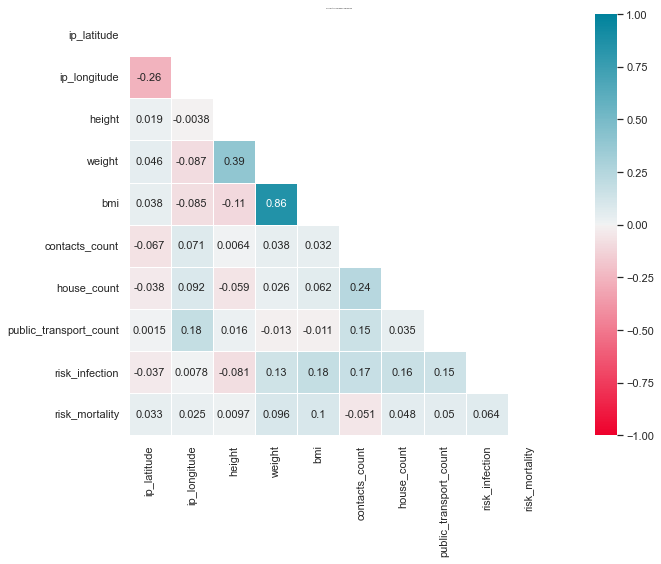

In [53]:
## Task 3, 3)
## The preferred method for making the correlation matrix.

## Multiple Correlation Matrices are created.
## At each stage we identify the most highly correlated variables and continue on without them to a new correlation matrix.

## Stage 1 - emove Binary/Categorical Variables
stage1_exclusions = ['region','country','ip_accuracy','gender','age','blood_type','insurance','income','race','immigrant','smoking','working','worried','covid19_positive','covid19_symptoms','covid19_contact','asthma','kidney_disease','liver_disease','compromised_immune','heart_disease','lung_disease','diabetes','hiv_positive','hypertension','other_chronic','nursing_home','health_worker']
correlation_matrix = df.loc[:, ~df.columns.isin(stage1_exclusions)].corr()

## Stage 2 - remove bmi and risk_infection
## BMI and height/weight
stage2_sub_corA = df[['height','weight','bmi']].corr()
## 'weight' has a correlation of 0.855 with 'bmi'. Since 'weight' is used to calculte 'bmi' we remove bmi.

stage2_sub_corB = df[['covid19_positive','risk_infection']].corr()
## 'covid19_positive' status has a correlation of 0.963 with 'risk of infection'.
## We remove since 'risk_infection' since it is calculated based on 'covid19_positive' and wish to explore further without it's influence.
## BMI is a calculated quantity based on height and weight and is therefore redundant.

stage2_exclusions = [*stage1_exclusions,*['bmi']]
# stage2_exclusions = [*stage1_exclusions,*['bmi','risk_infection']]

# correlation_matrix = df.loc[:, ~df.columns.isin(stage2_exclusions)].corr()

## Stage 3 - explore covid19_contact, contacts_count and house_count 
stage3_exclusions = [*stage2_exclusions,*['covid19_contact','contacts_count','house_count']]
stage3_sub_corA = df[['covid19_contact','contacts_count','house_count']].corr()
# print(stage2_sub_corA)

# df.boxplot(column = ['contacts_count','house_count'], by=['covid19_symptoms'])


## Correlation Matrix Visualisation
sns.set(style='white')
mask = np.zeros_like(correlation_matrix,dtype=bool)
mask[np.triu_indices_from(mask)]=True

f, ax = plt.subplots(figsize=(13,8))
cmap=sns.diverging_palette(10,220,100,as_cmap=True)
ax = sns.heatmap(correlation_matrix,mask=mask,
                cmap=cmap,
                 vmax=1,
                 vmin=-1,
                 annot=True,annot_kws={'size':11},
                square=True,xticklabels=True,yticklabels=True,linewidths=.5,
                cbar_kws={'shrink': 1}, ax=ax)
ax.set_title('Correlation beween variables',fontsize=2);
# plt.savefig()

root_dir = globals()['_dh'][0]
corr_dir = os.path.join(root_dir,"graphs/")
plt.tight_layout()
plt.show()
plt.savefig(corr_dir+f"correlation2.png")
# plt.savefig(corr_dir+f"correlation.svg", format="svg")
plt.close()

In [64]:
# Task 4, 3)
df.info()

# Data Cleaning
def preprocess_data(df):
    
    # Cleaning stuff.
    
    # Variable 1 - Region
    df['region'] = df['region'].replace(np.nan, "NA")
    
    # Variable 2 - Country
    df['country'] = df['country'].replace(np.nan, df['country'].mode()[0])
    
    # Variable 12 - Insurance
    df['insurance'] = df['insurance'].replace(np.nan, "blank")
    df['insurance'] = df['insurance'].replace("blank", df['insurance'].mode()[0])


    #replace values with the mean/median
    
    # Variable 17 - Contacts Count - Integer type, so replace with median.
    df['contacts_count'].fillna(df['contacts_count'].median(), inplace=True)
    
    # Variable 19 - Public Transport Count - Integer type, so replace with median.
    df['public_transport_count'].fillna(df['public_transport_count'].median(), inplace=True)
    
    #categorical values: replace with mode 
    
    # Variable 13 - Income
    df['income'].fillna(df['income'].mode()[0], inplace=True)
    df['income'] = df['income'].replace('blank', df['income'].mode()[0])
        
    # Variable 14 - Race
    df['race'].fillna(df['race'].mode()[0], inplace=True)
    df['race'] = df['race'].replace('blank', df['race'].mode()[0])
        
    # Variable 15 -Immigrant
    df['immigrant'].fillna(df['immigrant'].mode()[0], inplace=True)
    df['immigrant'] = df['immigrant'].replace('blank', df['immigrant'].mode()[0])
    
    # Variable 16 - Smoking
    df['smoking'].fillna(df['smoking'].mode()[0], inplace=True)
    
    # Variable 20 - Working
    df['working'].fillna(df['working'].mode()[0], inplace=True)
    
    # Variable 21 - Worried
    df['worried'].fillna(df['worried'].mode()[0], inplace=True)
         
    return df

df2 = preprocess_data(df)
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   survey_date             5111 non-null   datetime64[ns]
 1   region                  1485 non-null   category      
 2   country                 5109 non-null   category      
 3   ip_latitude             5111 non-null   float64       
 4   ip_longitude            5111 non-null   float64       
 5   ip_accuracy             5111 non-null   category      
 6   gender                  5111 non-null   category      
 7   age                     5111 non-null   category      
 8   height                  5111 non-null   float64       
 9   weight                  5111 non-null   float64       
 10  bmi                     5111 non-null   float64       
 11  blood_type              5111 non-null   category      
 12  insurance               3943 non-null   category

In [65]:
# Dump cleaned and processed dataset to csv
df2.to_csv("D1-processed.csv")